<a href="https://colab.research.google.com/github/juancho0809/SystemsAnalysis/blob/main/Workshop1/Clase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Workshop I - Systems Analysis
##Workshop Definition:
- Welcome to the first workshop of Systems Analysis course. Let’s funny me with a biological exercise.

- Imagine you have been hired as data analyst in an important biotechnology company. Your boss, science chief officer, want to get some patterns in genomic data, sometimes called motifs. __check__

- Here you will have some tasks in order to complete this workshop: Create a dummy database of genetic sequences composed of nucleotide bases (A, C, G, T), where each sequence must have between 10 and 20 bases. Your database must be composed for 50.000 genetic sequences. __check__

- Get the motifs (must repeated sequence) of size 6 and 8. Use the Shannon Entropy measurement to filter sequences with not a good variance level. Get again the motifs of size 6 and 8.

- Write some conclusions based on your analysis. Write any technical concern/decision/difficulty you think is relevant regarding your work. You must deliver a full report detailing each one of the previous steps. For steeps 1 to 4 you must describe the algorithms you propose and let an screenshot about the code and the output of the code. I strongly recommend you to use a Jupyter Notebook or a COLAB to write/execute your code.




- Initialize the libraries we use to develop the code


In [108]:
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

###Then, we start to make the first functions to begin the proccess such as:
- Shannon_entropy
- Create_sequence
- Create_database


ANTES DE FILTRADO
                Sequence   Entropy
0       GGTACCTGTGCCAACG  1.954434
1     CGTAACAGGACGACACCC  1.772077
2      TCGCTGGGAGAAGCTAG  1.901506
3     CGGCTGAGCTTTGTCAAC  1.970825
4         CCCCATTAAACCAC  1.431560
..                   ...       ...
495   AATGTATACCGACCACAC  1.841250
496          TTACTTGTCTG  1.685816
497   AGCGGAAGCCTTCTGATC  1.991076
498      GCCTACGAGACCTCA  1.889246
499  GGTCCGGAAAGAACGTTGG  1.873221

[500 rows x 2 columns]
After Filter
                SequenceF  EntropyF
0        GGTACCTGTGCCAACG  1.954434
1      CGGCTGAGCTTTGTCAAC  1.970825
2          GATCCCATTGGTAT  1.959190
3        CAGCTCTGAGTACGCT  1.977217
4    CTTCTTCGGTCTAATAGGAG  1.958872
..                    ...       ...
108         AAACGGCTTCCGT  1.987773
109         CCGATCGCTAAGA  1.950064
110        GGTACATTGGCATA  1.950212
111    TTTGAGGGGCCCCACTAC  1.954686
112    AGCGGAAGCCTTCTGATC  1.991076

[113 rows x 2 columns]


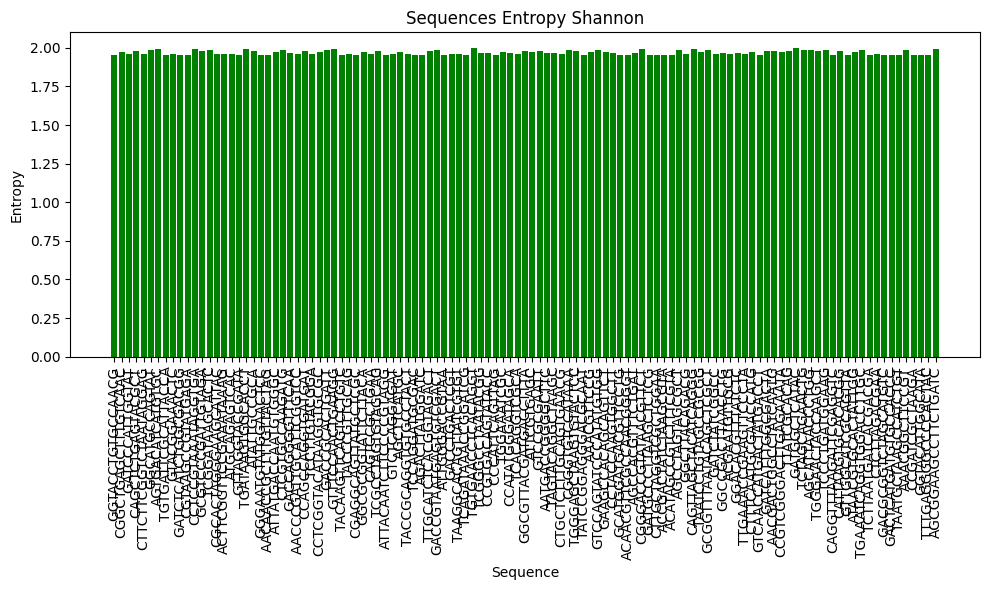

In [173]:
"""
We create a dictionary for make an count for the symbols and then put the formula from Shannon Entropy
"""
def shannon_entropy(data_bd):
    sequences = {}
    for symbol in data_bd:
        if symbol in sequences:
            sequences[symbol] += 1
        else:
            sequences[symbol] = 1

    probabilities = [frequency / len(data_bd) for frequency in sequences.values()]

    entropy = -sum(probability * math.log2(probability) for probability in probabilities)

    return entropy

"""
As we see in class, we make new sequences with size 10-20 of nucleotids bases

"""
def create_sequence():
  nucleotid_bases = ['A','C','G','T']
  size_sequence = random.randint(10,20)
  new_sequence = [nucleotid_bases[random.randint(0,3)] for i in range(size_sequence)]

  return "".join(new_sequence)
"""
Depending the size we create the database (dummie db)
"""
def create_database():
  db_size = 500
  data_base = [create_sequence() for i in range(db_size)]
  return data_base

data_base = create_database()
sequences_entropy = [shannon_entropy(sequence) for sequence in data_base]

"""
To make the outputs more easy to see, we use pandas and matplot to make
graphics with the db
"""

table = {
    'Sequence': data_base,
    'Entropy': sequences_entropy
}

pf = pd.DataFrame(table)
print("ANTES DE FILTRADO")
print(pf)

"""
Then we make another table with the purpose and the filter is entropy > 1.95
"""
filtered_sequences = [seq for seq, entropy in zip(data_base, sequences_entropy) if entropy > 1.95]
filtered_entropies = [entropy for entropy in sequences_entropy if entropy > 1.95]

#Table with filters
table = {
    'SequenceF': filtered_sequences,
    'EntropyF': filtered_entropies
}

pf = pd.DataFrame(table)

print("After Filter")
print(pf)

#Determinate size
plt.figure(figsize=(10, 6))

#graphic the filter
plt.bar(pf['SequenceF'], pf['EntropyF'], color='green')

#put tags
plt.xlabel('Sequence')
plt.ylabel('Entropy')
plt.title('Sequences Entropy Shannon')


plt.xticks(rotation=90)

plt.tight_layout()
plt.show()



- After the previous analysis we need to determinate some vital factors

In [170]:
"""
In the class we make the recursive function with the purpose of determinated which sequence is the mode (statistics)
The unique change we need to make is change where was 'sequence_db' to filtered_entropies
"""
def get_combinations(n,sequences,bases):
  if n == 1:
    return [sequence+base for sequence in sequences for base in bases]
  else:
    sequence_ = [sequence+base for sequence in sequences for base in bases]
    return get_combinations(n-1,sequence_ , bases)

def count_motif(motif, filtered_entropies):
  count = 0
  for sequence in filtered_entropies:
    count += sequence.count(motif)
  return count

"""
Here we compare who is the motif winner taking account the combinations
"""
def get_motif(motif_size, filtered_entropies):
   nucleotid_bases = ['A','C','G','T']
   combinations = get_combinations(motif_size, [""], nucleotid_bases)
   max_counter = 0
   motif_winner = ""
   for motif_candidate in combinations:
      temp_counter = count_motif(motif_candidate, filtered_entropies)
      if temp_counter > max_counter:
        max_counter = temp_counter
        motif_winner = motif_candidate

   return motif_winner, max_counter


- And after get the motifs we conclude choosing the size of the motif

In [171]:
print(get_motif(6, filtered_sequences))

('CCAGGT', 4)


In [172]:
print(get_motif(8, filtered_sequences))

('ACTGTTTA', 2)
